In [139]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi, sqrt
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere


In [140]:
def ExecutePlot(job, backend = 'statevector'):
    blochSphere = ""
    phasePlot = ""
    
    simulator = Aer.get_backend(backend+'_simulator')
    
    result = simulator.run(job, shots = 1024).result() # Do the simulation and return the result
    
    if backend != "qasm":
        out_state = result.get_statevector()
        print("StateVector: ",out_state) # Display the output state vector
        blochSphere = plot_bloch_multivector(out_state)
        phasePlot = plot_state_qsphere(out_state)
        
    
    counts = result.get_counts()
    print("Counts     : ",counts)
    histogram = plot_histogram(counts)
    return histogram, blochSphere, phasePlot

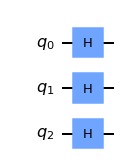

In [141]:
circuit = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    circuit.h(qubit)

job = assemble(circuit)
    
# See the circuit:
circuit.draw('mpl')

StateVector:  [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]
Counts     :  {'000': 0.125, '001': 0.125, '010': 0.125, '011': 0.125, '100': 0.125, '101': 0.125, '110': 0.125, '111': 0.125}


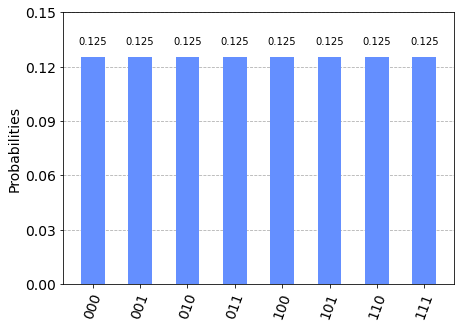

In [142]:
# Let's see the result
histogram, _, _ = ExecutePlot(job)
histogram

# Quantum Entanglement

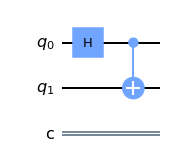

In [143]:
circuit = QuantumCircuit(2,1)
# Apply H-gate to the first:
circuit.h(0)
circuit.cx(0,1)
job = assemble(circuit)

circuit.draw('mpl')

StateVector:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Counts     :  {'0': 1}


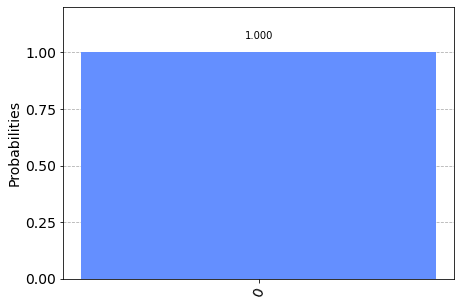

In [144]:
histogram, blochSphere, phasePlot = ExecutePlot(job)
histogram

Bloch-Spheres cannot be plotted for two entangled qubits.

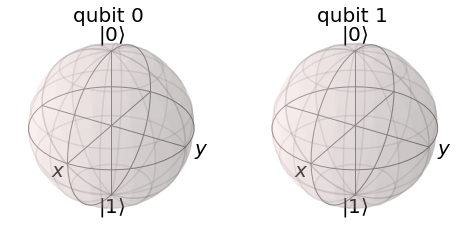

In [145]:
blochSphere

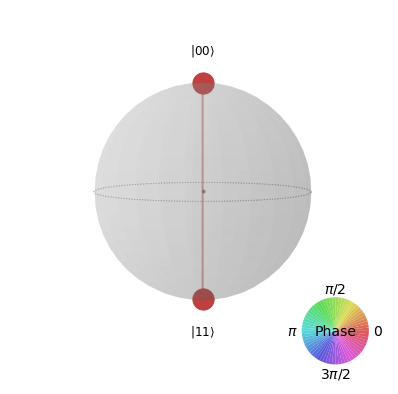

In [146]:
phasePlot

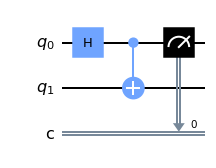

In [147]:
circuit.measure(0,0)
job = assemble(circuit)

circuit.draw('mpl')

However, Measuring either collapses both the qubits and both yield the same output.

Bloch Spheres Can now bw plotted for both Qubits

**NOTE:**

Use Qasm_Simulator to visualise The Probabilities of the end state.

Statevector_Simulator somehow does not plot the probabilities. It just plots the final state of one run

StateVector:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Counts     :  {'01': 1}


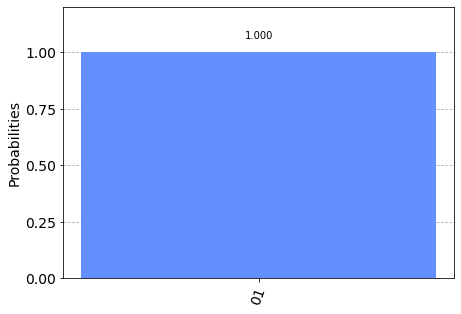

In [213]:
histogram, blochSphere, phasePlot = ExecutePlot(job)#,"qasm")
histogram

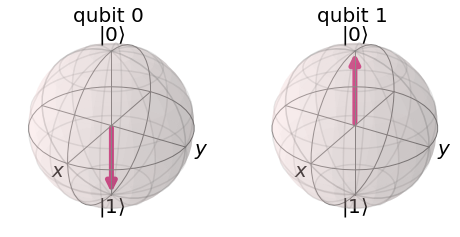

In [214]:
blochSphere

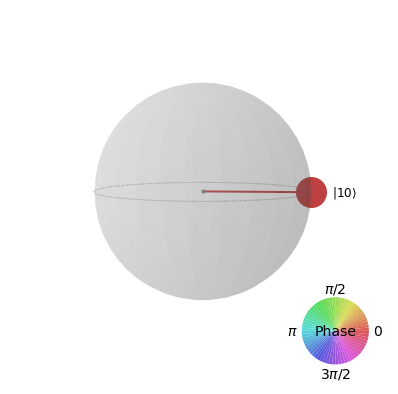

In [212]:
phasePlot

Being _**Entangled**_ means that measuring one will instantly collapse the other.

It **DOES NOT** mean they will always have the same state


**NOTE:**
Entangled qubits can be plotted on the bloch sphere if the probabilities of their final state are heavily skewed.

This can be seen in the following example.

Here, upon initialise q0 to a different state, we heavily skew the probabilities of the entangled qubits in favour of a particular state. Thus, we are able to plot the qubits in the bloch Sphere.

_**OR, Does it mean, these qubits are not entangled?**_

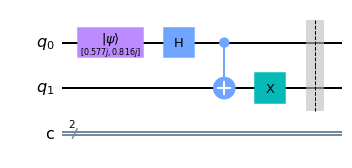

In [234]:
circuit = QuantumCircuit(2,2)
# Apply H-gate to the first:
circuit.initialize([1j*1/sqrt(3), 1j*sqrt(2/3)],0)
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.barrier()
job = assemble(circuit)

circuit.draw('mpl')

StateVector:  [ 0.00000000e+00+0.j         -7.07050159e-17-0.16910198j
  7.07050159e-17+0.98559856j  0.00000000e+00+0.j        ]
Counts     :  {'00': 1}


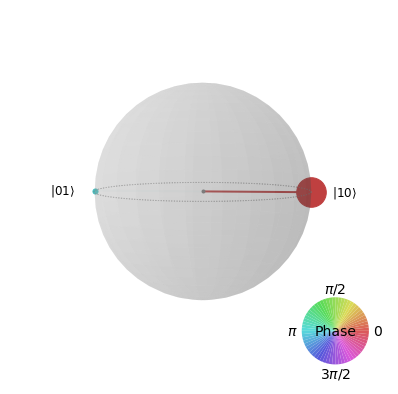

In [235]:
histogram, blochSphere, phasePlot = ExecutePlot(job)
phasePlot

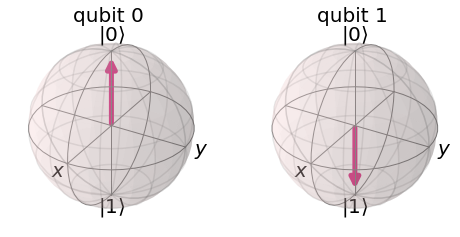

In [236]:
blochSphere

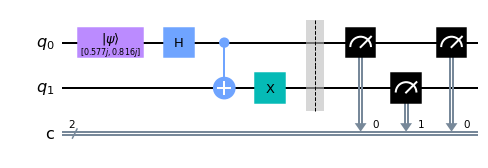

In [239]:
circuit.measure(0,0)
circuit.measure(1,1)
job = assemble(circuit)
circuit.draw('mpl')

Counts     :  {'01': 24, '10': 1000}


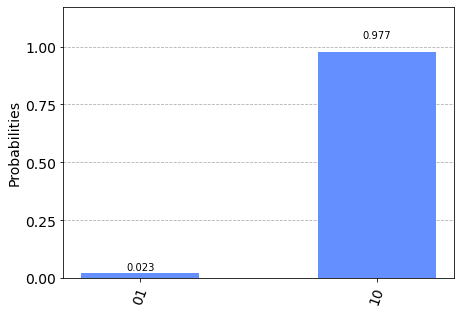

In [240]:
histogram, _, _ = ExecutePlot(job,"qasm")
histogram